# Part 3: Random Forest

### Objective

**Fit Model:** We will forecast the price of municipal green bonds on the "covid", "post_covid", and "full" dataset using *Random Forest*. To select the hyperparameters for our model, we will do time series cross validation on the training set. When doing this time series cross validation, we will when possible test the default hyperparameters against new hyperparameters. Sometimes, documentation on the tree model is not complete, and the exact default hyperparameter is not confidently known. 

**Evaluate Forecast:** Once we have trained our model on the 80% of training data, we will test it against the 20% of testing data. We will plot the results of our forecasts for the "covid", "post covid", and "full" data sets. We will display the mean squared error (MSE), $r^2$, root mean squared error (RMSE), mean absolute error (MAE), and mean absolute percentage error (MAPE) of our forecats. 

**Explain Forecast:** Finally, we will use the "shap" package in python to plot various SHAP graphs, which will give us an explanation behind the drivers of our forecasted values over the testing set. 


In [17]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import shap

import my_functions

shap.initjs()

## Default Parameters

- n_estimators: 100  
- learning_rate: Random Forest does not using learning rate parameter because it does not use gradient boosting  
- max_depth: none. By default, there is no max depth, meaning the trees can grow as large as they need to achieve pure leaves  

## Import Data

In [18]:
# import all data
df_covid = pd.read_excel("./cleaned_excel_data/covid_data.xlsx")
df_post_covid = pd.read_excel("./cleaned_excel_data/post_covid_data.xlsx")
df_full = pd.read_excel("./cleaned_excel_data/full_data.xlsx")

In [19]:
# covid data
X_covid = df_covid.drop(columns=['date', 'mgb_log_diff'])
y_covid = df_covid['mgb_log_diff']
# train test split
split_idx = int(0.8 * len(df_covid))
X_train_covid, X_test_covid = X_covid[:split_idx], X_covid[split_idx:]
y_train_covid, y_test_covid = y_covid[:split_idx], y_covid[split_idx:]


# post covid data
X_post_covid = df_post_covid.drop(columns=['date', 'mgb_log_diff'])
y_post_covid = df_post_covid['mgb_log_diff']
# train test split
split_idx = int(0.8 * len(df_post_covid))
X_train_post_covid, X_test_post_covid = X_post_covid[:split_idx], X_post_covid[split_idx:]
y_train_post_covid, y_test_post_covid = y_post_covid[:split_idx], y_post_covid[split_idx:]

# full data
X_full = df_full.drop(columns=['date', 'mgb_log_diff'])
y_full = df_full['mgb_log_diff']
# train test split
split_idx = int(0.8 * len(df_full))
X_train_full, X_test_full = X_full[:split_idx], X_full[split_idx:]
y_train_full, y_test_full = y_full[:split_idx], y_full[split_idx:]

## Find Optimal Parameters (Time Series Cross Validation)

Since I've tuned these models before, I have a good idea of parameters close to the optimal selection. 

In [20]:
param_grid = {
    'max_depth': [6,8,10, None],
    'n_estimators' : [75, 100, 125]
}

#### Covid Time Period

In [21]:
best_params_covid, best_mse_covid = my_functions.time_series_cv_tuning_rf(X_train_covid, y_train_covid, param_grid, print_results = False)


Testing parameters: {'max_depth': 6, 'n_estimators': 75}
Avg MSE: 281.2590

Testing parameters: {'max_depth': 6, 'n_estimators': 100}
Avg MSE: 336.3630

Testing parameters: {'max_depth': 6, 'n_estimators': 125}
Avg MSE: 256.9959

Testing parameters: {'max_depth': 8, 'n_estimators': 75}
Avg MSE: 223.9601

Testing parameters: {'max_depth': 8, 'n_estimators': 100}
Avg MSE: 251.7547

Testing parameters: {'max_depth': 8, 'n_estimators': 125}
Avg MSE: 267.8239

Testing parameters: {'max_depth': 10, 'n_estimators': 75}
Avg MSE: 283.0326

Testing parameters: {'max_depth': 10, 'n_estimators': 100}
Avg MSE: 523.0045

Testing parameters: {'max_depth': 10, 'n_estimators': 125}
Avg MSE: 356.6200

Testing parameters: {'max_depth': None, 'n_estimators': 75}
Avg MSE: 240.0026

Testing parameters: {'max_depth': None, 'n_estimators': 100}
Avg MSE: 372.4033

Testing parameters: {'max_depth': None, 'n_estimators': 125}
Avg MSE: 274.2434

Best Parameters: {'max_depth': 8, 'n_estimators': 75}
Best MSE: 223

#### Post Covid Time Period

In [22]:
best_params_post_covid, best_mse_post_covid = my_functions.time_series_cv_tuning_rf(X_train_post_covid, y_train_post_covid, param_grid, print_results = False)


Testing parameters: {'max_depth': 6, 'n_estimators': 75}
Avg MSE: 28.5244

Testing parameters: {'max_depth': 6, 'n_estimators': 100}
Avg MSE: 28.6395

Testing parameters: {'max_depth': 6, 'n_estimators': 125}
Avg MSE: 28.4582

Testing parameters: {'max_depth': 8, 'n_estimators': 75}
Avg MSE: 28.6366

Testing parameters: {'max_depth': 8, 'n_estimators': 100}
Avg MSE: 29.8527

Testing parameters: {'max_depth': 8, 'n_estimators': 125}
Avg MSE: 28.3082

Testing parameters: {'max_depth': 10, 'n_estimators': 75}
Avg MSE: 31.5540

Testing parameters: {'max_depth': 10, 'n_estimators': 100}
Avg MSE: 31.2168

Testing parameters: {'max_depth': 10, 'n_estimators': 125}
Avg MSE: 27.4062

Testing parameters: {'max_depth': None, 'n_estimators': 75}
Avg MSE: 30.3561

Testing parameters: {'max_depth': None, 'n_estimators': 100}
Avg MSE: 28.5566

Testing parameters: {'max_depth': None, 'n_estimators': 125}
Avg MSE: 28.4745

Best Parameters: {'max_depth': 10, 'n_estimators': 125}
Best MSE: 27.4062


#### Full Time Period

In [23]:
best_params_full, best_mse_full = my_functions.time_series_cv_tuning_rf(X_train_full, y_train_full, param_grid, print_results = False)


Testing parameters: {'max_depth': 6, 'n_estimators': 75}
Avg MSE: 356.8537

Testing parameters: {'max_depth': 6, 'n_estimators': 100}
Avg MSE: 377.1287

Testing parameters: {'max_depth': 6, 'n_estimators': 125}
Avg MSE: 246.9183

Testing parameters: {'max_depth': 8, 'n_estimators': 75}
Avg MSE: 248.2466

Testing parameters: {'max_depth': 8, 'n_estimators': 100}
Avg MSE: 192.9536

Testing parameters: {'max_depth': 8, 'n_estimators': 125}
Avg MSE: 251.9481

Testing parameters: {'max_depth': 10, 'n_estimators': 75}
Avg MSE: 259.3651

Testing parameters: {'max_depth': 10, 'n_estimators': 100}
Avg MSE: 266.5820

Testing parameters: {'max_depth': 10, 'n_estimators': 125}
Avg MSE: 299.8284

Testing parameters: {'max_depth': None, 'n_estimators': 75}
Avg MSE: 310.3837

Testing parameters: {'max_depth': None, 'n_estimators': 100}
Avg MSE: 263.1727

Testing parameters: {'max_depth': None, 'n_estimators': 125}
Avg MSE: 242.9785

Best Parameters: {'max_depth': 8, 'n_estimators': 100}
Best MSE: 19

## See Quality of Prediction 

We will use the optimal parameters to train the model

#### Covid Time Period

In [24]:
model_rf_covid = RandomForestRegressor(criterion='squared_error', verbose=0, **best_params_covid)
model_rf_covid.fit(X_train_covid, y_train_covid)

RandomForestRegressor(max_depth=8, n_estimators=75)

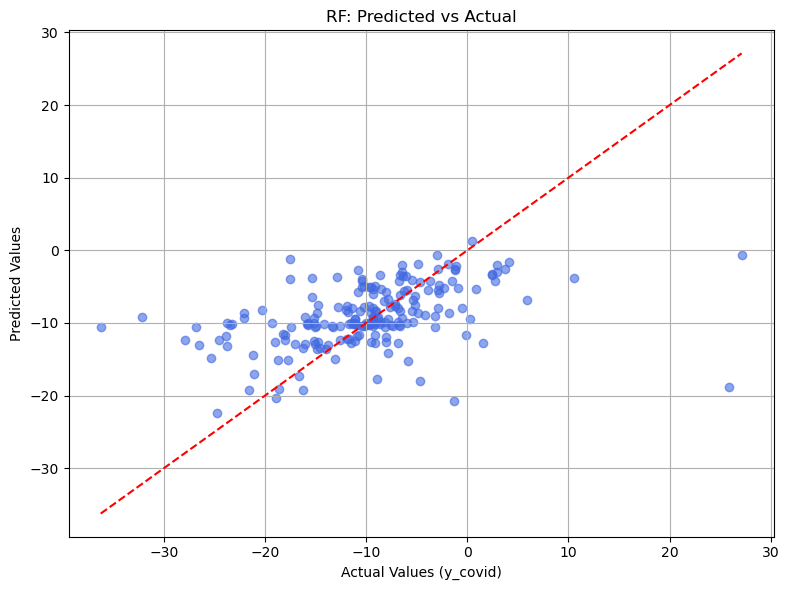

MSE of RF: 53.3573
R² of RF: 0.1731
RMSE of RF: 7.3046
MAE of RF: 4.8001
MAPE of RF: 1.40%


In [25]:
metrics = my_functions.evaluate_model_performance(model_rf_covid, X_test_covid, y_test_covid, 
                                   model_name="RF", target_name="y_covid")

#### Post Covid Time Period

In [26]:
model_rf_post_covid = RandomForestRegressor(criterion='squared_error', verbose=0, **best_params_post_covid)
model_rf_post_covid.fit(X_train_post_covid, y_train_post_covid)

RandomForestRegressor(max_depth=10, n_estimators=125)

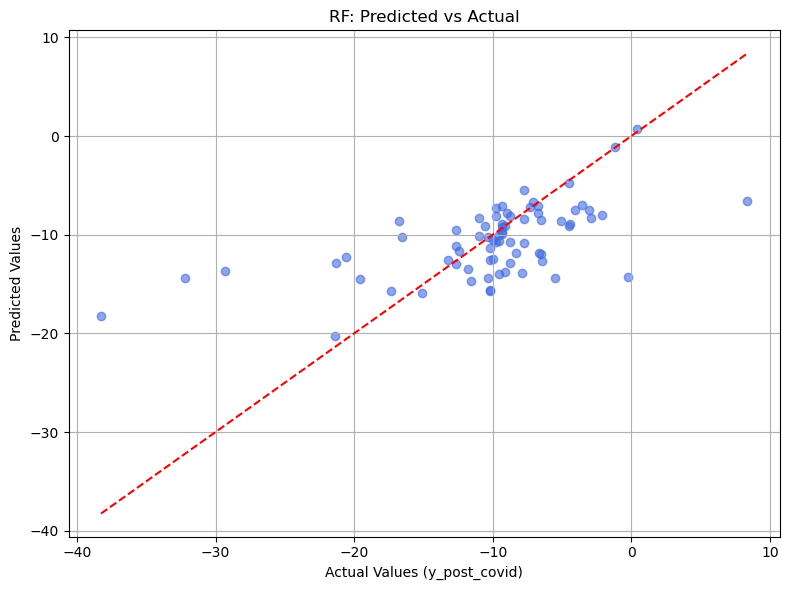

MSE of RF: 31.1007
R² of RF: 0.3422
RMSE of RF: 5.5768
MAE of RF: 3.6830
MAPE of RF: 1.12%


In [27]:
metrics = my_functions.evaluate_model_performance(model_rf_post_covid, X_test_post_covid, y_test_post_covid, 
                                   model_name="RF", target_name="y_post_covid")

#### Full Time Period

In [28]:
model_rf_full = RandomForestRegressor(criterion='squared_error', verbose=0, **best_params_full)
model_rf_full.fit(X_train_full, y_train_full)

RandomForestRegressor(max_depth=8)

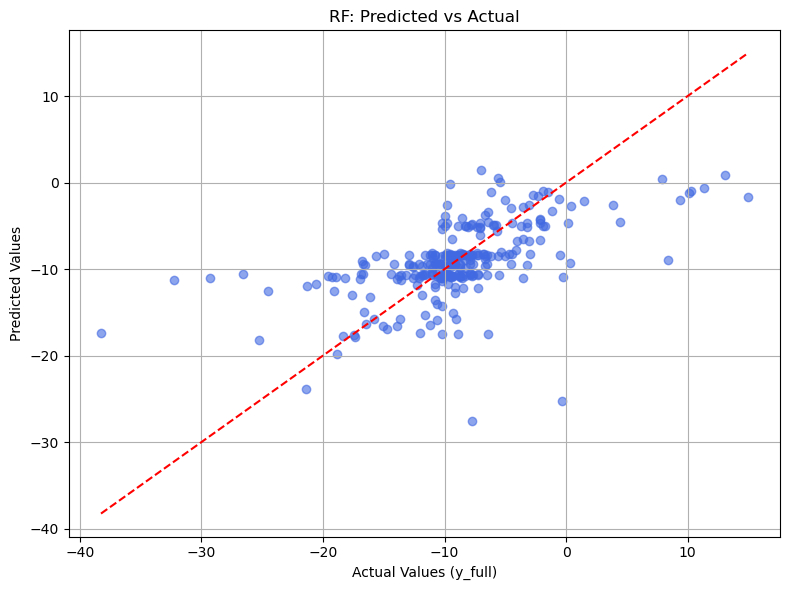

MSE of RF: 26.3582
R² of RF: 0.3232
RMSE of RF: 5.1340
MAE of RF: 3.3780
MAPE of RF: 1.12%


In [29]:
metrics = my_functions.evaluate_model_performance(model_rf_full, X_test_full, y_test_full, 
                                   model_name="RF", target_name="y_full")

## SHAP Plots

We will fit SHAP plots onto the test set.

#### Covid Time Period

1. Beeswarm plot


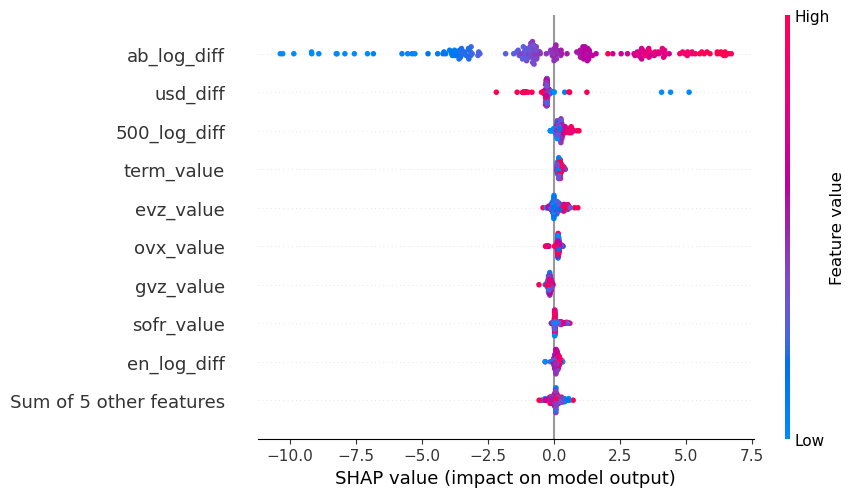

2. Feature importance bar plot


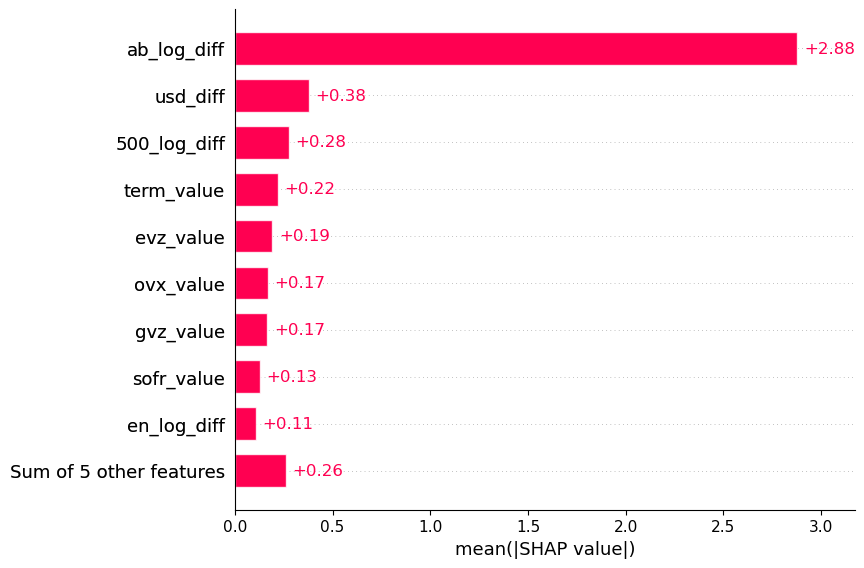

3. Dependence plots grid


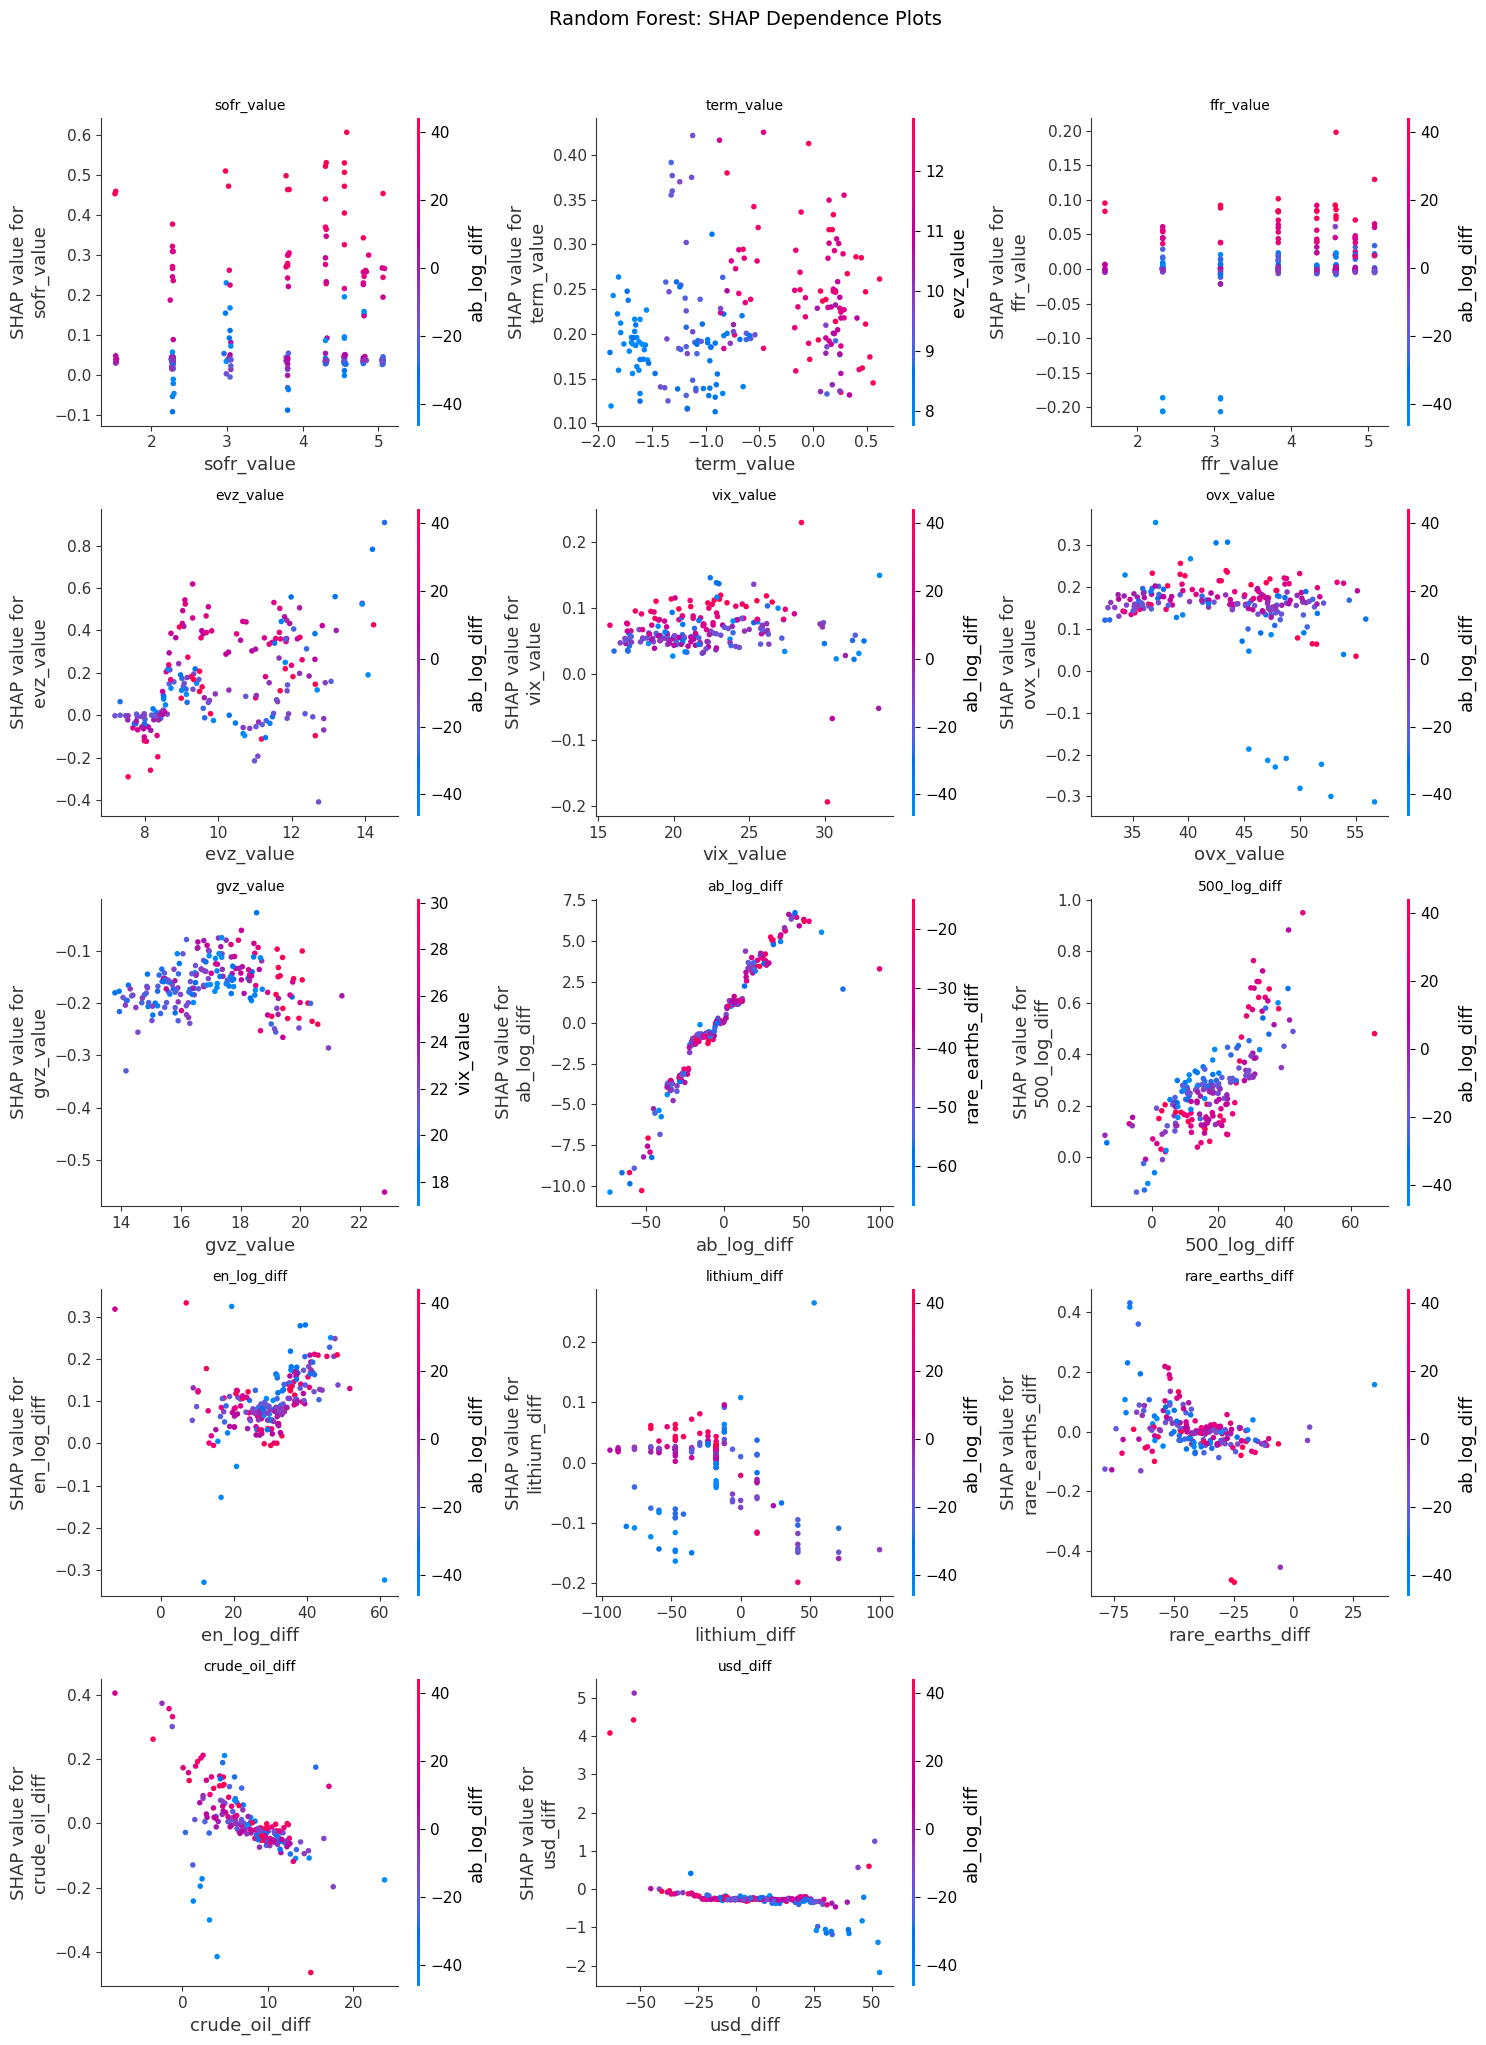

4. Heatmap ordered by predictions


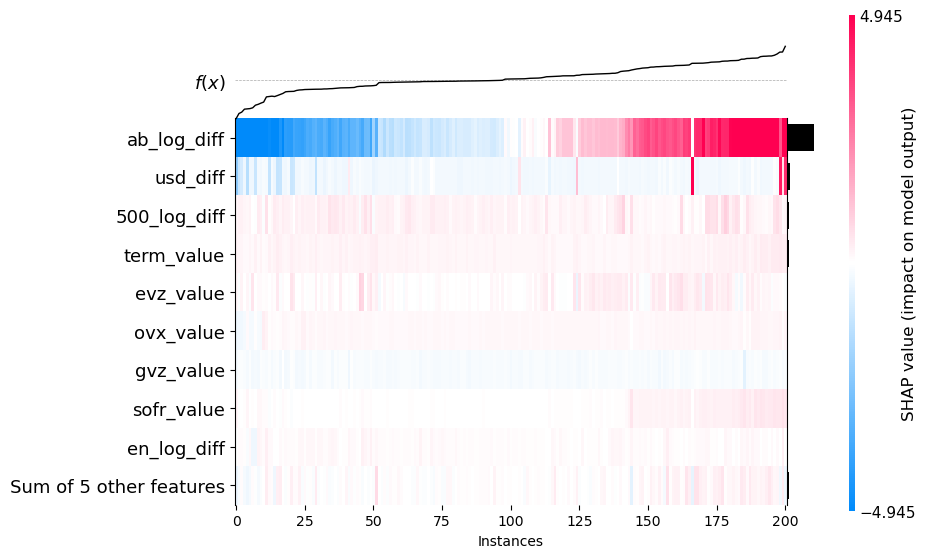

In [30]:
shap_covid = my_functions.shap_analysis_complete(model_rf_covid, X_train_covid, X_test_covid, 
                                model_name="Random Forest", n_cols=3)

#### Post Covid Time Period

1. Beeswarm plot


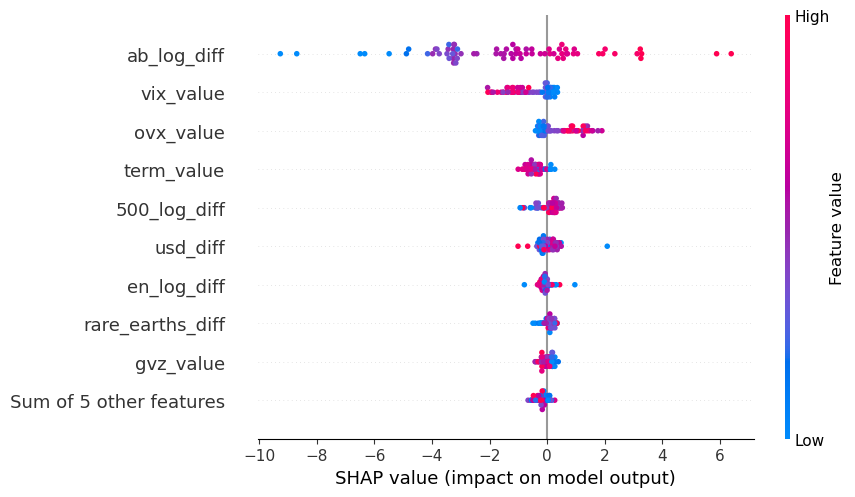

2. Feature importance bar plot


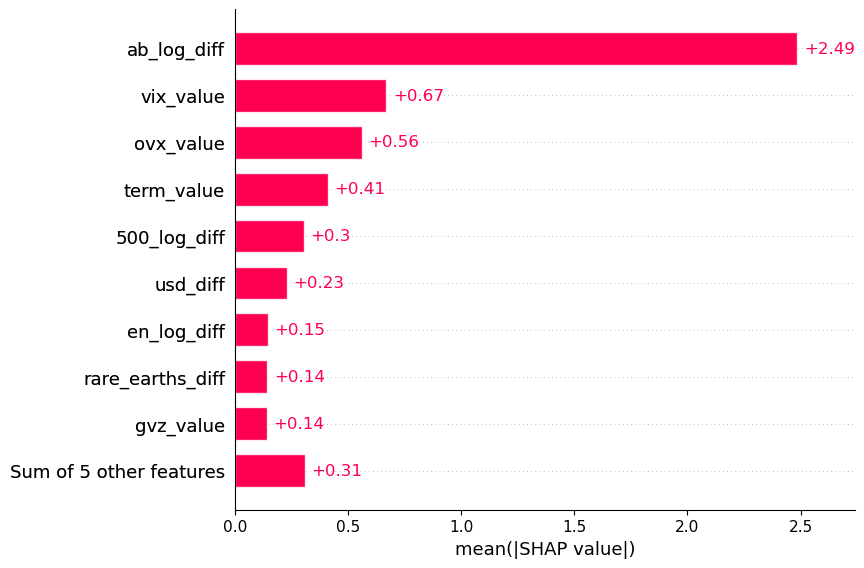

3. Dependence plots grid


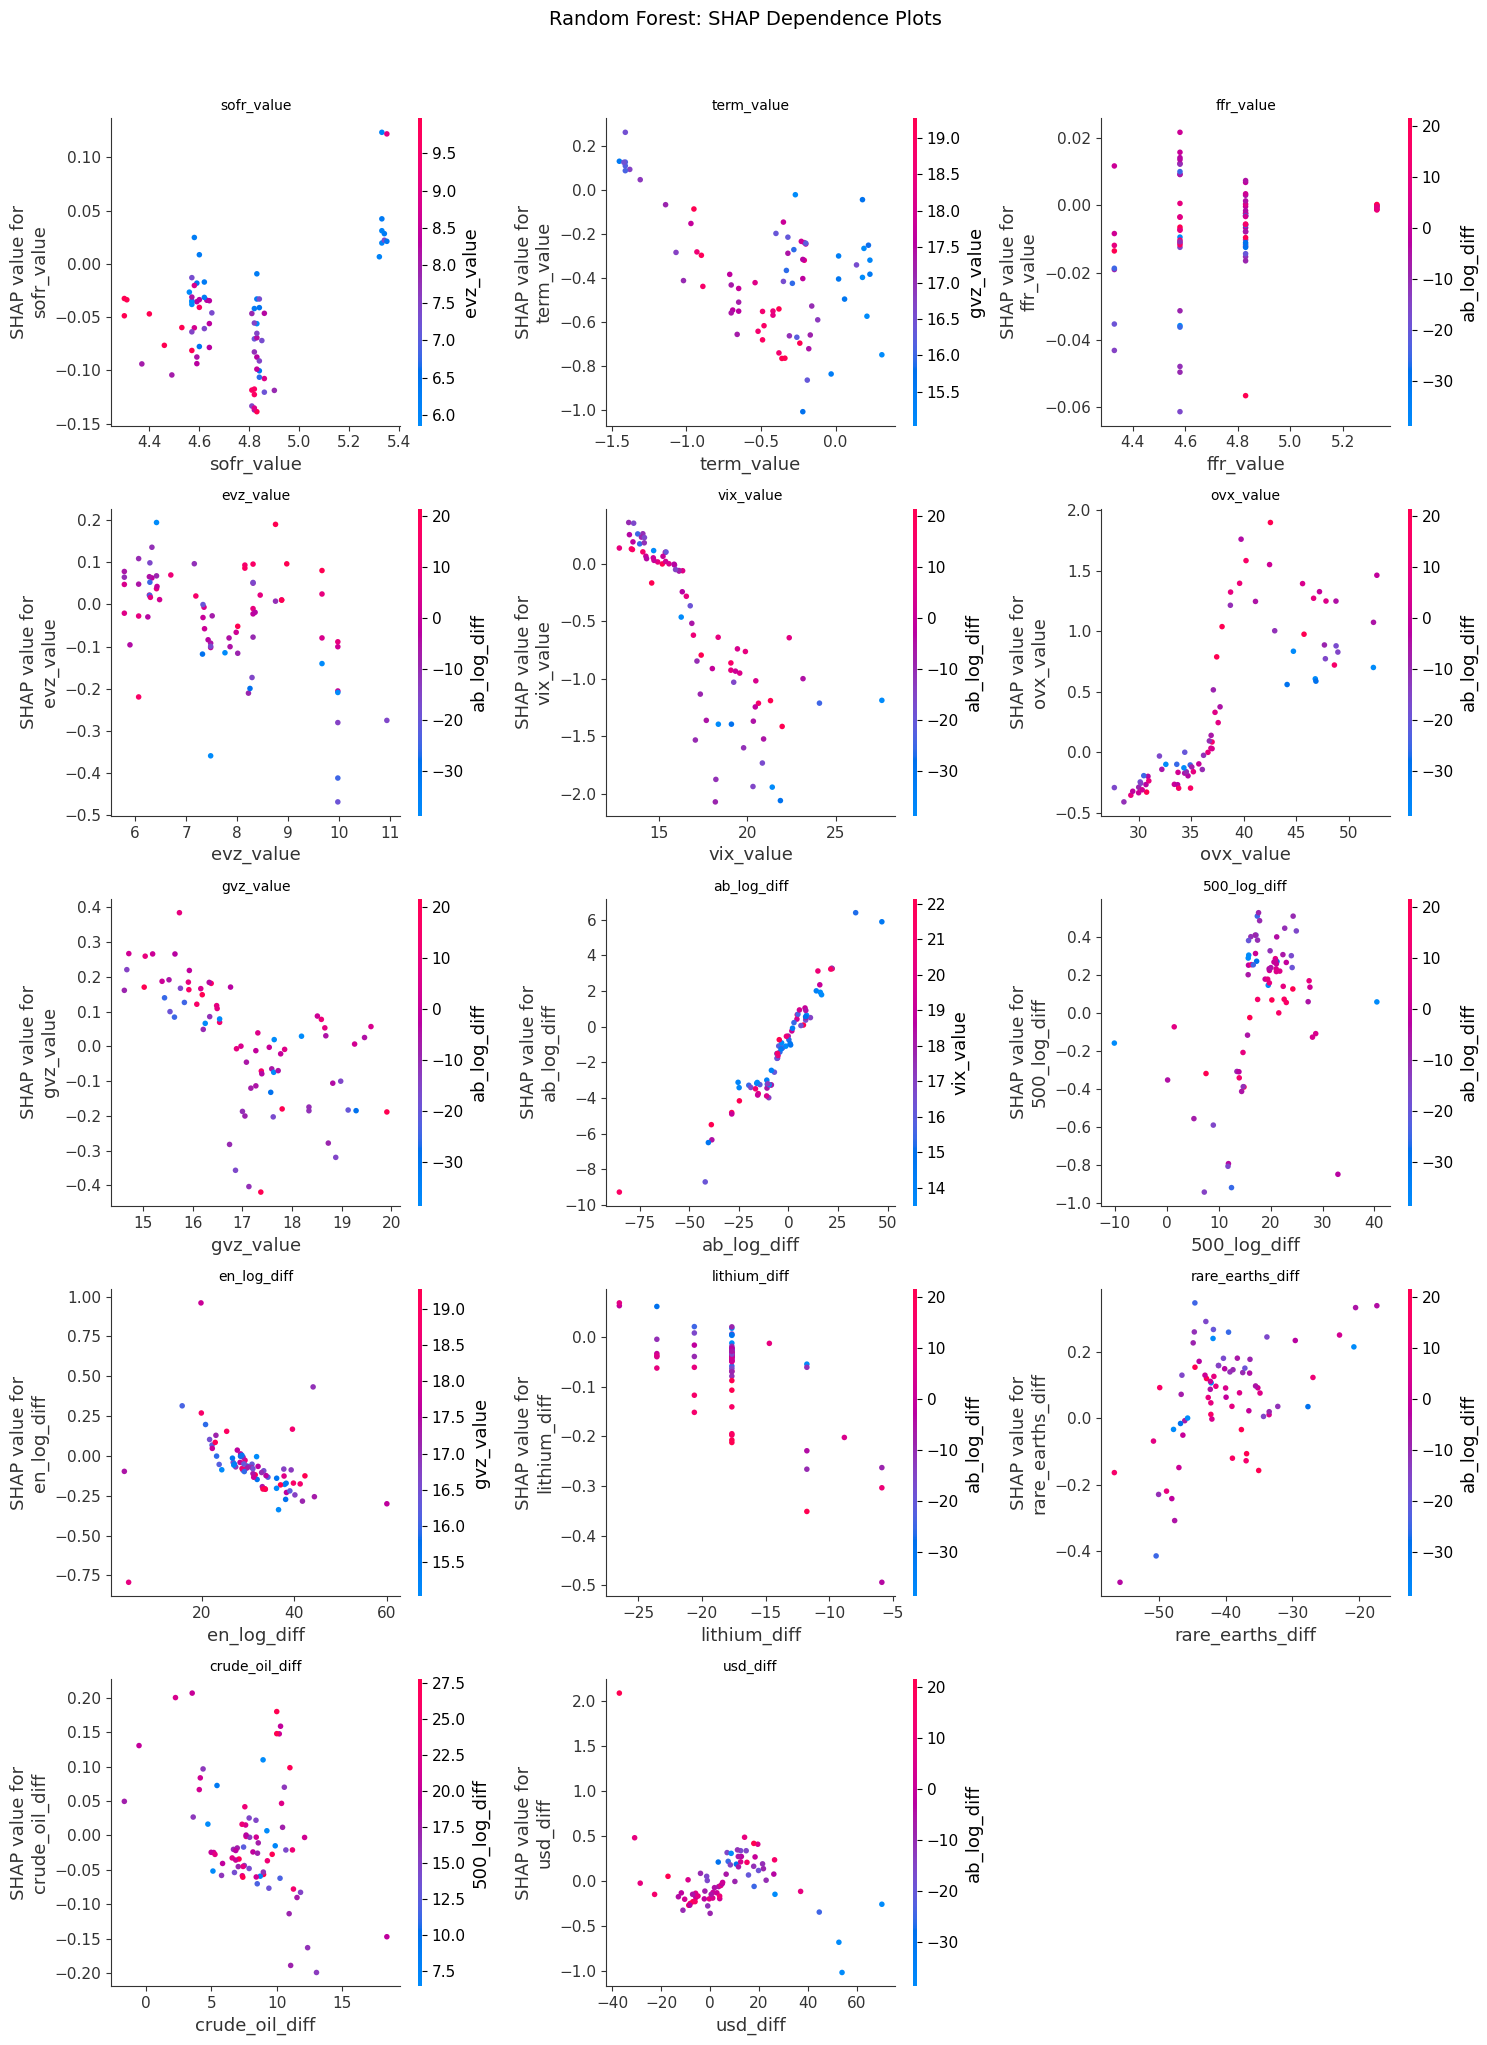

4. Heatmap ordered by predictions


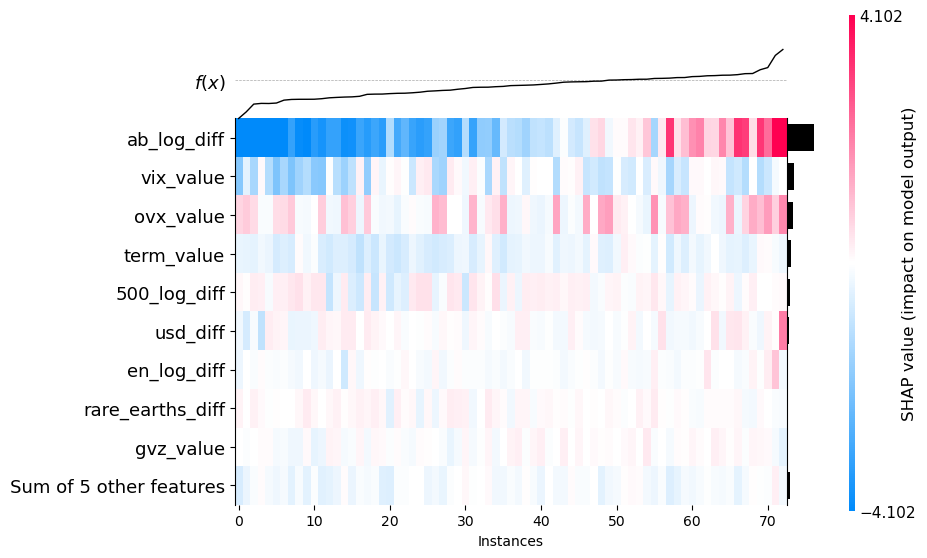

In [31]:
shap_post_covid = my_functions.shap_analysis_complete(model_rf_post_covid, X_train_post_covid, X_test_post_covid, 
                                model_name="Random Forest", n_cols=3)

#### Full Time Period

1. Beeswarm plot


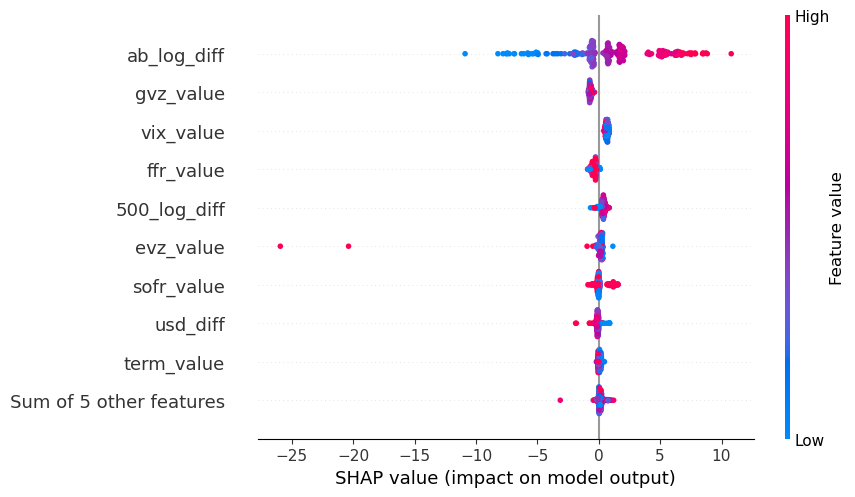

2. Feature importance bar plot


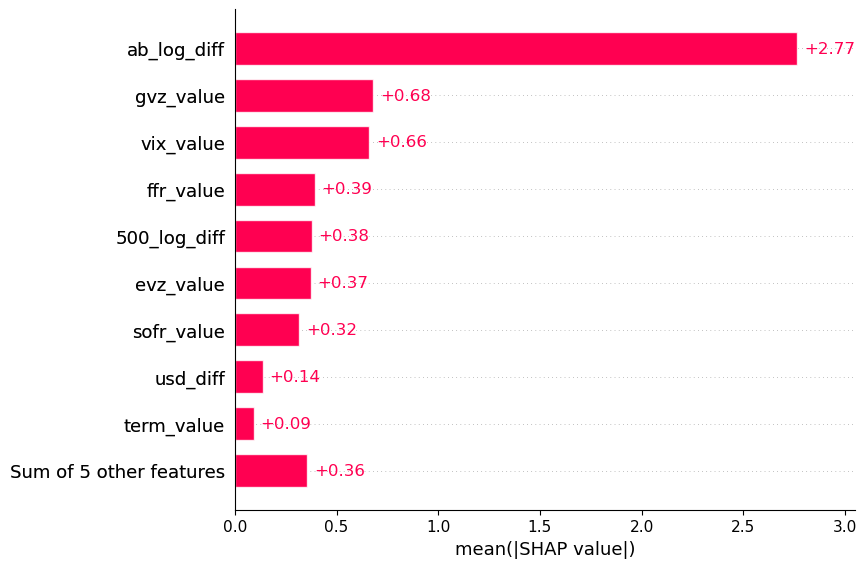

3. Dependence plots grid


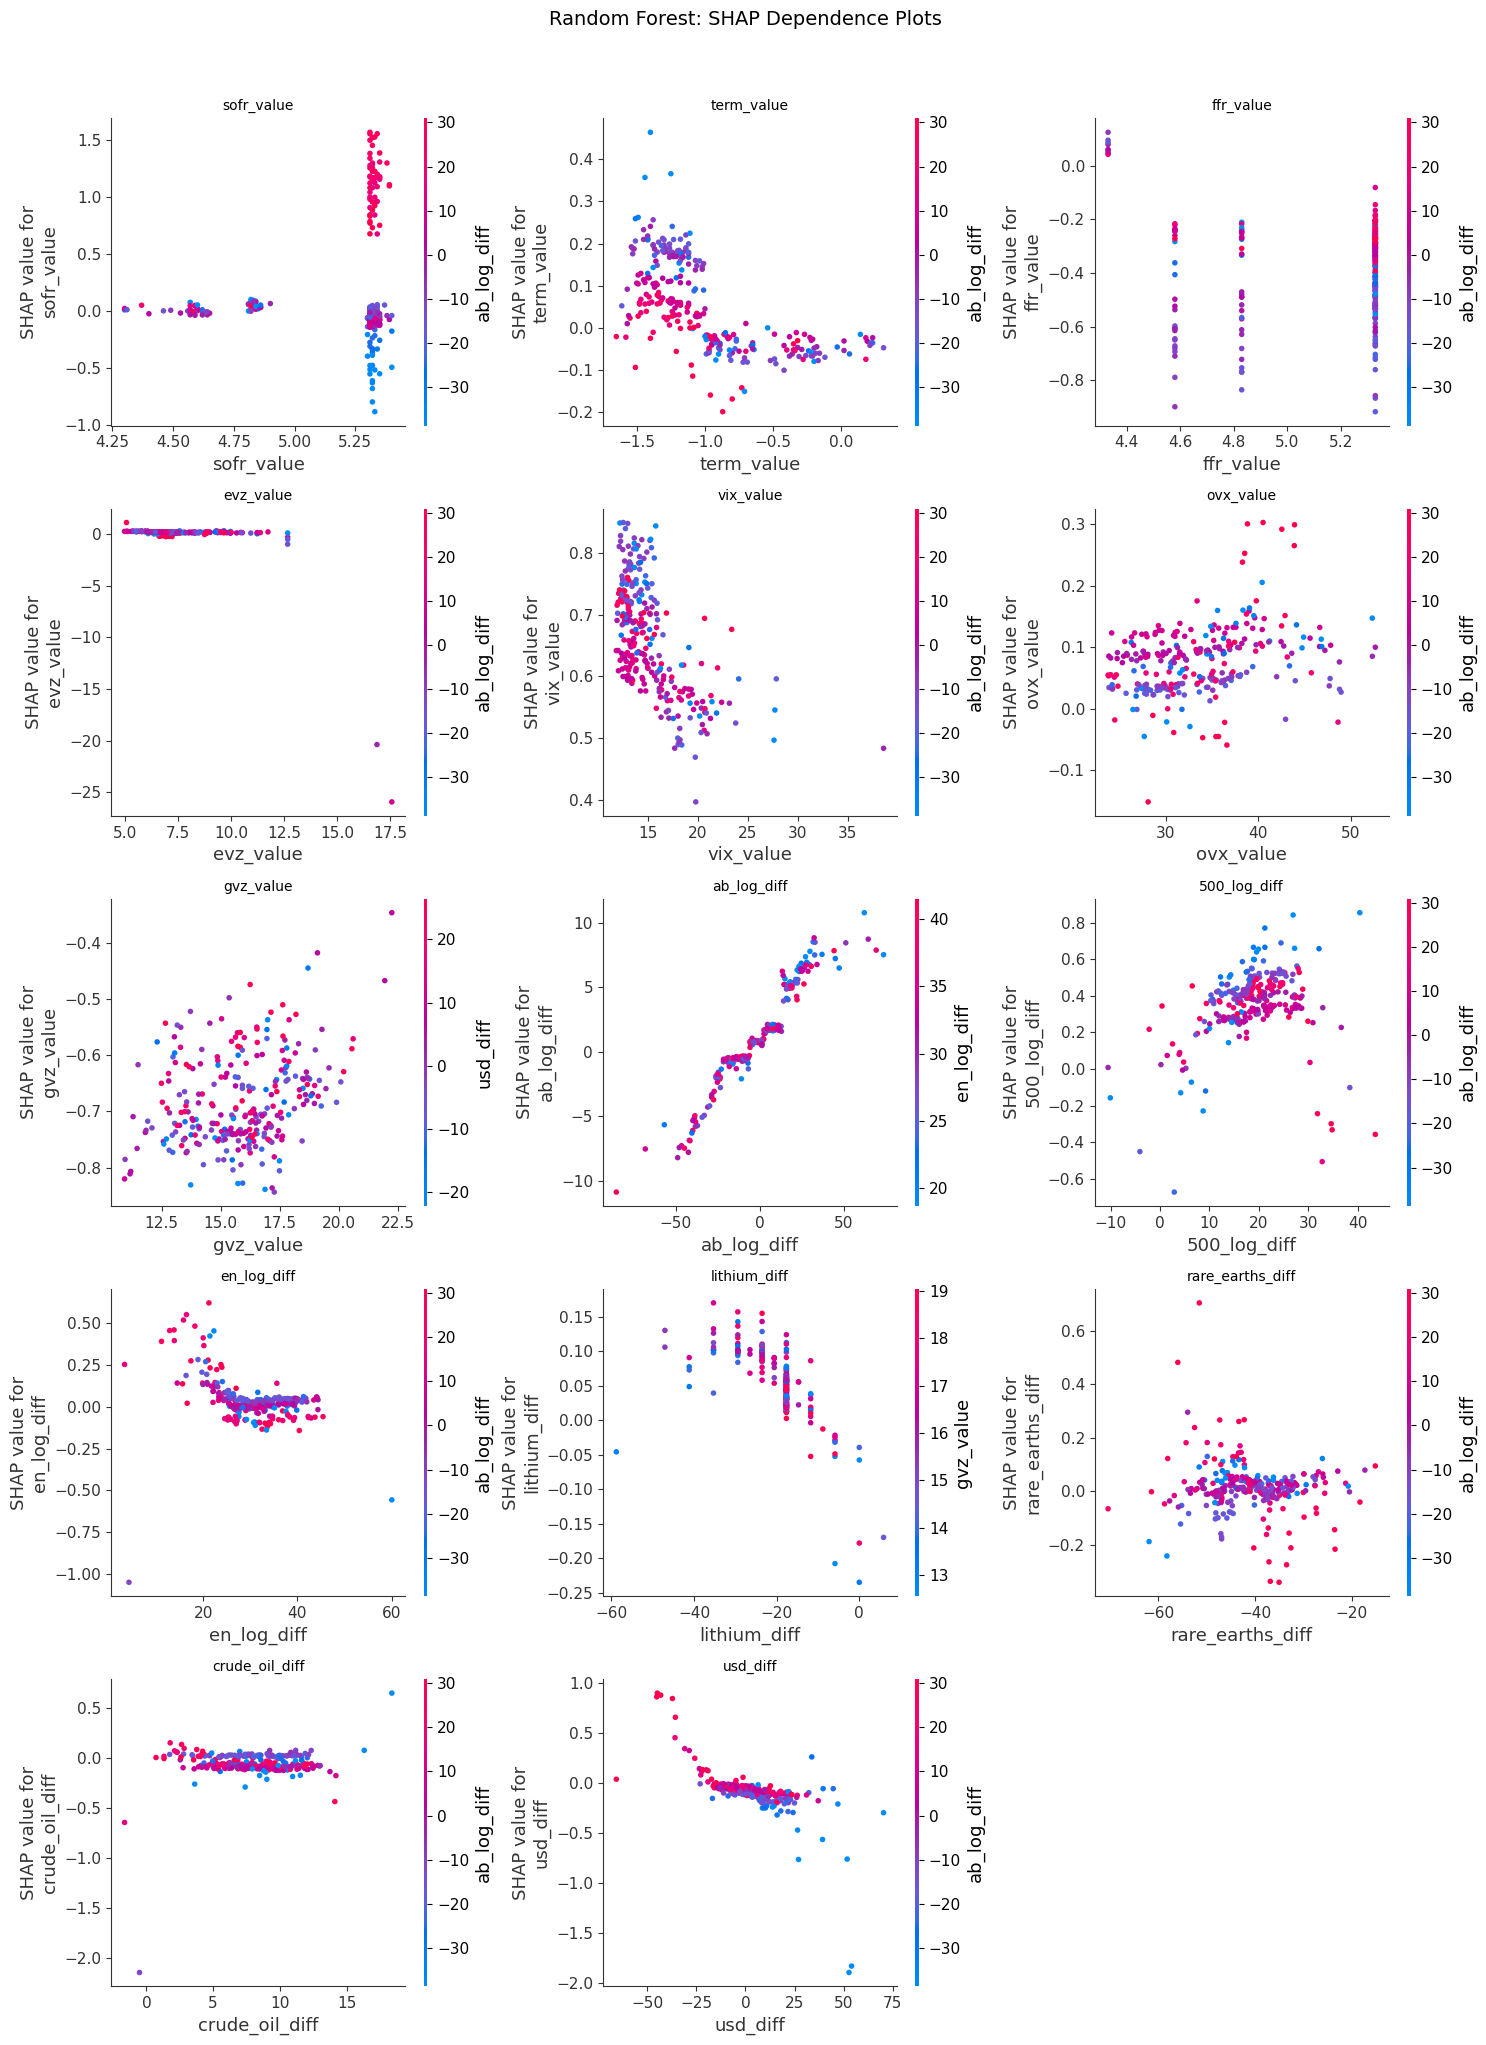

4. Heatmap ordered by predictions


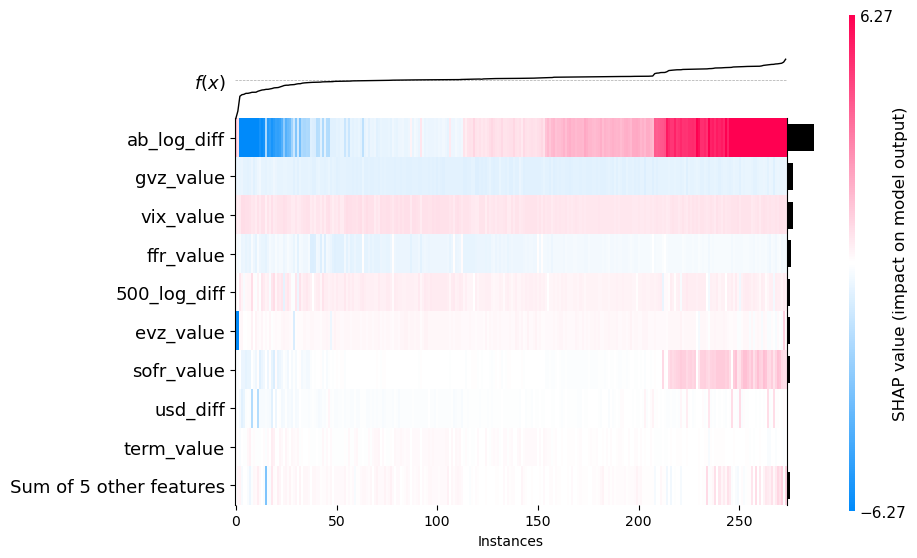

In [16]:
shap_full = my_functions.shap_analysis_complete(model_rf_full, X_train_full, X_test_full, 
                                model_name="Random Forest", n_cols=3)